# Preliminary data analysis and pre-processing

In [31]:
from __future__ import division, print_function
from os.path import join
import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd

from codes import cross_validate_classifier, \
                  format_classifier_performance, \
                  plot_confusion_matrix

Import the data and specify the column names manually.

In [2]:
column_names = (
    [
    'Elevation',
    'Aspect_angle',
    'Slope',
    'Horiz_dist_to_nearest_water',
    'Vert_dist_to_nearest_water',
    'Horiz_dist_to_nearest_road',
    'Incident_sunlight_at_9am',
    'Incident_sunlight_at_12pm',
    'Incident_sunlight_at_3pm',
    'Horiz_dist_to_fire_ignition_point'    
    ]
    + ['Wilderness_area_{}'.format(i) for i in range(4)]
    + ['Soil_type_{}'.format(i) for i in range(40)]
    + ['Cover_type']
)

column_types = {
    name: np.float32 for name in column_names[:10]}.update(
    {name: np.int8 for name in column_names[10:]})

cover_types = [
    'Spruce/fir',
    'Lodgepole pine',
    'Ponderosa pine',
    'Cottonwood/willow',
    'Aspen',
    'Douglas-fir',
    'Krummholz'
]

data = pd.read_csv(join('data','covtype.data'), header=None, names=column_names, dtype=column_types)

In [3]:
data.head()

,Elevation,Aspect_angle,Slope,Horiz_dist_to_nearest_water,Vert_dist_to_nearest_water,Horiz_dist_to_nearest_road,Incident_sunlight_at_9am,Incident_sunlight_at_12pm,Incident_sunlight_at_3pm,Horiz_dist_to_fire_ignition_point,...,Soil_type_31,Soil_type_32,Soil_type_33,Soil_type_34,Soil_type_35,Soil_type_36,Soil_type_37,Soil_type_38,Soil_type_39,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [55]:
descr = data[column_names[:10]].describe(percentiles=[0.1, 0.5, 0.9])
descr

,Elevation,Aspect_angle,Slope,Horiz_dist_to_nearest_water,Vert_dist_to_nearest_water,Horiz_dist_to_nearest_road,Incident_sunlight_at_9am,Incident_sunlight_at_12pm,Incident_sunlight_at_3pm,Horiz_dist_to_fire_ignition_point
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,2581.000000,24.000000,5.000000,30.000000,0.000000,591.000000,176.000000,198.000000,95.000000,595.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
90%,3272.000000,329.000000,24.000000,564.000000,121.000000,4793.000000,241.000000,247.000000,191.000000,3747.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


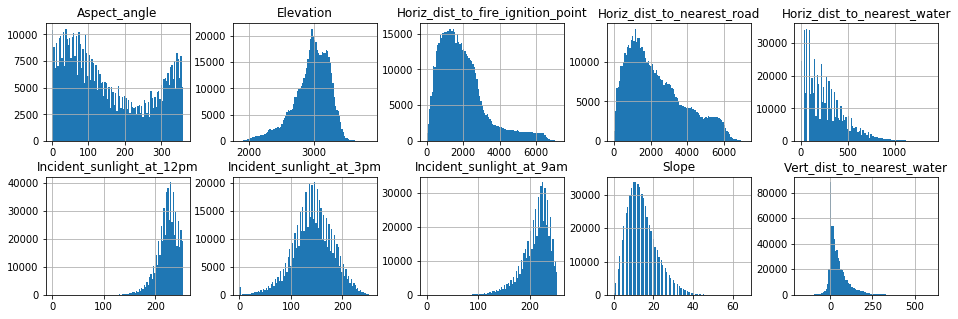

In [33]:
fig = plt.figure(figsize=(16, 5))
layout = (2, 5)
gs = GridSpec(*layout)
axes = [plt.subplot(gs[np.unravel_index(i, layout)]) for i in range(10)]
data[column_names[:10]].hist(bins=100, ax=axes)
plt.show()

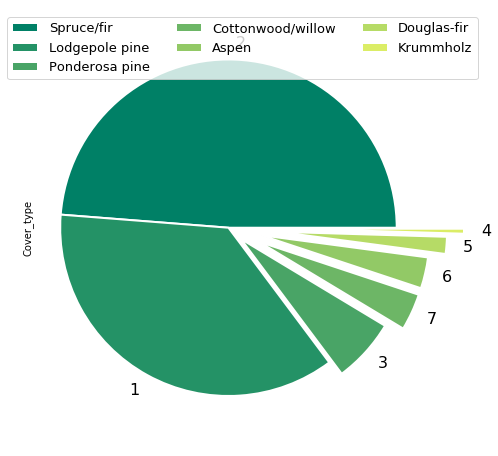

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_type, dtype: int64


In [106]:
cmap = plt.cm.get_cmap('summer')

fig = plt.figure(figsize=(8, 8))
data['Cover_type'].value_counts().plot(
    kind='pie', explode=(0, 0, 0.1, 0.2, 0.2, 0.3, 0.4),
    wedgeprops={'linewidth':2, 'edgecolor': 'w'},
    colors=[cmap(i) for i in np.arange(7)/7], fontsize=16
)
plt.axis('equal')
plt.legend(labels=cover_types, fontsize=13, ncol=3)
plt.show()

print(data['Cover_type'].value_counts())

In [5]:
column_correlations = data.corr(method='pearson')

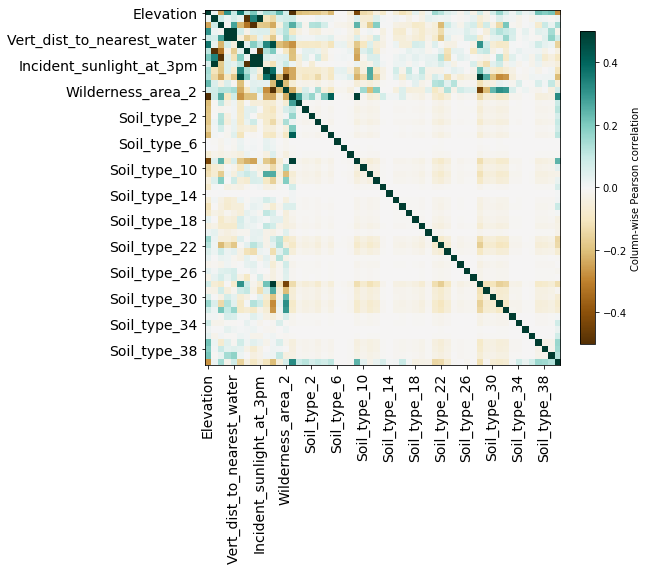

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(column_correlations, cmap=plt.cm.BrBG,
          vmin=-0.5, vmax=0.5, interpolation='nearest')
cbar = plt.colorbar(im, fraction=0.04)
cbar.set_label('Column-wise Pearson correlation')
ticks = np.arange(0, 54, 4); labels = np.array(column_names)[ticks]
ax.set_xticks(ticks); ax.set_yticks(ticks)
ax.set_yticklabels(labels, fontsize=14)
ax.set_xticklabels(labels, fontsize=14, rotation=90)

plt.show()

In [137]:
# Remove data that lies outside 10-90%
numeric_data = data[column_names[:10]]
bool_array = (
    ( numeric_data > numeric_data.quantile(0.000001) )
    & ( numeric_data < numeric_data.quantile(0.999999) ).values
)
rows_to_keep = np.all(bool_array, axis=1)

In [138]:
print(bool_array.shape)
reduced_data = numeric_data.values[rows_to_keep, :]
print(reduced_data.shape) #542401, 10

(581012, 10)
(542401, 10)


In [139]:
features = data[column_names[:10]].values
labels = data['Cover_type'].values - 1
print(features.shape, labels.shape)


# Remove negative outlier from vertical_distance to nearest water surface
#r = np.unravel_index(np.argmin(features), features.shape)[0]
features = features[rows_to_keep]
labels = labels[rows_to_keep]

print(features.shape, labels.shape)

(581012, 10) (581012,)
(542401, 10) (542401,)


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

tic = time.time()
cms = cross_validate_classifier(RandomForestClassifier,
                               features, labels,
                                kfold=2, kwargs={'n_estimators': 50, 'n_jobs': 6})
toc = time.time() - tic
print('Ran Classifier in {:.2f} s.'.format(toc))

Ran Classifier in 44.92 s.


In [143]:
print(format_classifier_performance(np.mean(cms, axis=0)))

# 0.00001
#Overall Accuracy: 0.943
#Mean Precision:   0.942 +/- 0.016
#Mean Recall:      0.865 +/- 0.092
#Mean F1 Score:    0.899 +/- 0.053

# 0.000001
#Overall Accuracy: 0.944
#   Mean Precision:   0.944 +/- 0.018
#Mean Recall:      0.874 +/- 0.085
#   Mean F1 Score:    0.905 +/- 0.049

# Full
#Overall Accuracy: 0.941
#    Mean Precision:   0.932 +/- 0.024
#    Mean Recall:      0.873 +/- 0.084
#    Mean F1 Score:    0.900 +/- 0.052


    Overall Accuracy: 0.955
    Mean Precision:   0.956 +/- 0.013
    Mean Recall:      0.888 +/- 0.085
    Mean F1 Score:    0.919 +/- 0.048
    


In [21]:
features[:, 4] += np.abs(np.min(features[:, 4]))
print(np.unravel_index(np.argmin(features), features.shape))

tic = time.time()
cms = cross_validate_classifier(MultinomialNB,
                               features, labels,
                                kfold=2)
toc = time.time() - tic
print('Ran Classifier in {:.2f} s.'.format(toc))

(0, 11)
Ran Classifier in 5.00 s.


In [22]:
print(format_classifier_performance(np.mean(cms, axis=0)))


    Overall Accuracy: 0.272
    Mean Precision:   0.212 +/- 0.202
    Mean Recall:      0.323 +/- 0.130
    Mean F1 Score:    0.191 +/- 0.122
    
